In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [191]:
tips = sns.load_dataset('tips')

In [192]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [193]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [194]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [195]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [196]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [197]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [198]:
print(f"The average of total_bill: {tips['total_bill'].mean()}")
print(f"The median of total_bill: {tips['total_bill'].median()}")

The average of total_bill: 19.78594262295082
The median of total_bill: 17.795


In [199]:
print(f"The maximum of total_bill: {tips['total_bill'].max()}")
print(f"The minumum of total_bill: {tips['total_bill'].min()}")

The maximum of total_bill: 50.81
The minumum of total_bill: 3.07


In [200]:
print(f"The average of tips: {tips['tip'].mean()}")
print(f"The median of tips: {tips['tip'].median()}")

The average of tips: 2.99827868852459
The median of tips: 2.9


In [201]:
print(f"The max tip recieved: {tips['total_bill'].max()}")
print(f"The minimum tip recived: {tips['total_bill'].min()}")

The max tip recieved: 50.81
The minimum tip recived: 3.07


In [202]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [203]:
def CategoryCount(Category):
    return tips[Category].value_counts()

<Axes: xlabel='sex', ylabel='tip'>

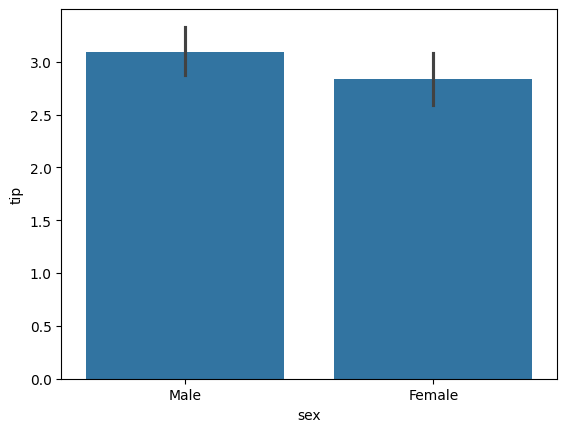

In [204]:
sns.barplot(x='sex', y='tip', data=tips)

### Seems like Male customers tip more often than the female

<Axes: xlabel='tip', ylabel='Count'>

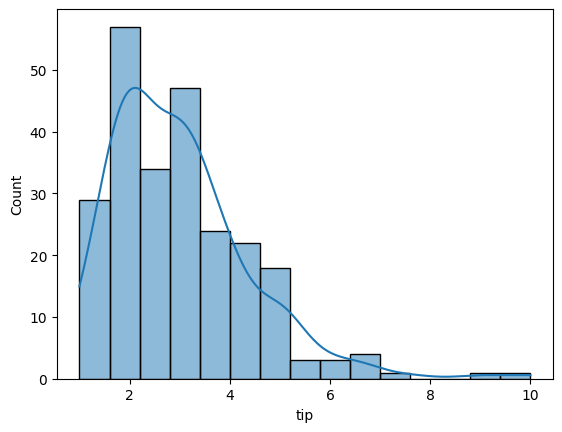

In [205]:
sns.histplot(tips['tip'], kde=True, bins=15)

### People seem to tip 2 dollars at the most while 10 being the most in amount but really rare 

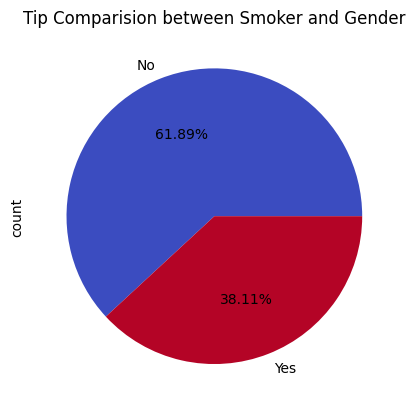

In [206]:
plt.title("Tip Comparision between Smoker and Gender")
tips['smoker'].value_counts().plot(kind='pie',autopct="%.2f%%", cmap='coolwarm')
plt.show()

61.89% of people do not smoke

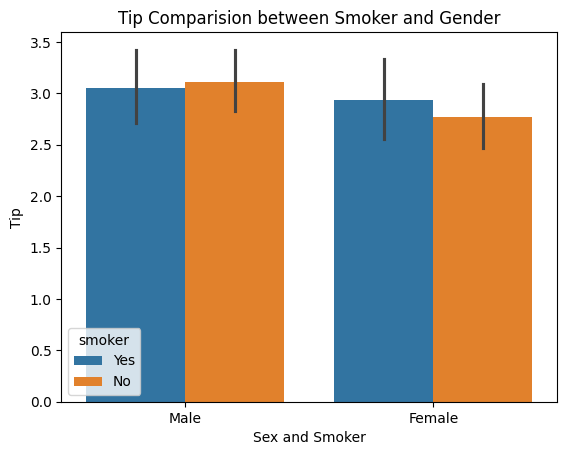

In [207]:
plt.title("Tip Comparision between Smoker and Gender")
sns.barplot(x='sex', y='tip', hue='smoker', data=tips)
plt.xlabel("Sex and Smoker")
plt.ylabel("Tip")
plt.show()

### The woman that smoke seem to tip more than normal, same goes for male 

<Axes: xlabel='day', ylabel='Count'>

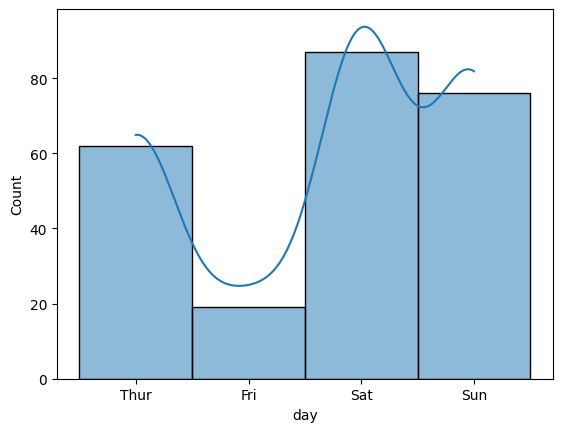

In [208]:
sns.histplot(tips['day'], kde=True)

### Most customers visit on the weekends

<Axes: xlabel='sex', ylabel='size'>

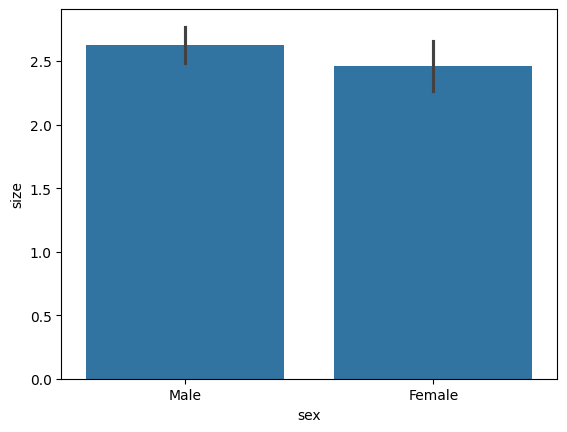

In [209]:
sns.barplot(x='sex', y='size', data=tips)

/tmp/ipykernel_694/610853173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="total_bill",y="time",data=tips,palette="magma")


<Axes: xlabel='total_bill', ylabel='time'>

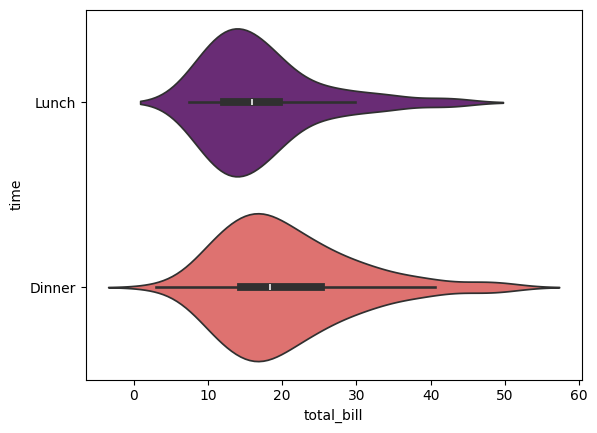

In [210]:
sns.violinplot(x="total_bill",y="time",data=tips,palette="magma")


Maximun people are observed for dinner

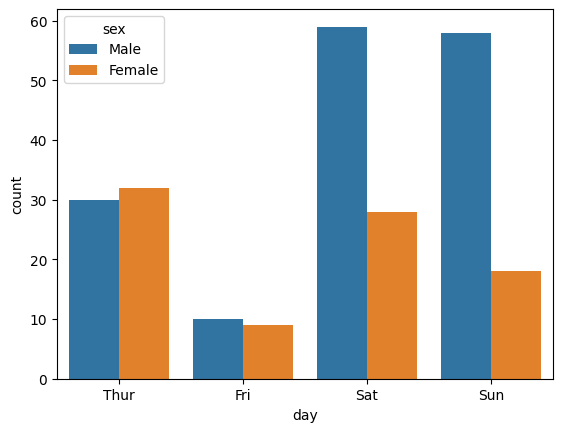

In [211]:
sns.countplot(x='day',data=tips,hue='sex')
plt.show()

There seem to be equal no of bill payerso on weekdays but male takes care of most of the bill on the weekends

sns.bar

### Male seem to order bigger size meals maybe that's the reason they tip more.

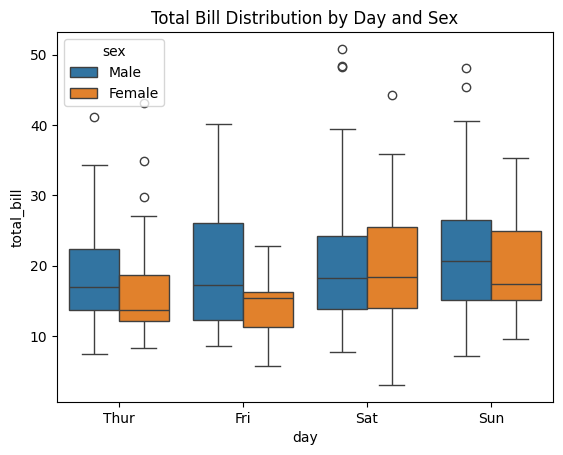

In [212]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title("Total Bill Distribution by Day and Sex")
plt.show()

### 50% of each category seems to be saturated around 17-19 and males seems to visit on the weekdays more often then woman

In [213]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


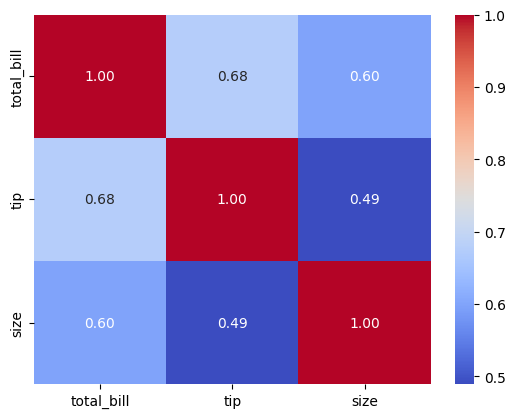

In [214]:
correlation_matrix = tips[['total_bill', 'tip', 'size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [215]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [252]:
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1
tips_no_outliers = tips[~((tips['tip'] < (Q1 - 1.5 * IQR)) | (tips['tip'] > (Q3 + 1.5 * IQR)))]

In [253]:
encoder = OneHotEncoder()

In [255]:
categorical_columns = ['sex', 'smoker', 'day', 'time']

tips_encoded = pd.get_dummies(tips_no_outliers, columns=categorical_columns, drop_first=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb680d88d40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb680d891c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb680d88aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb680d89820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb680d89a60>],
 'means': []}

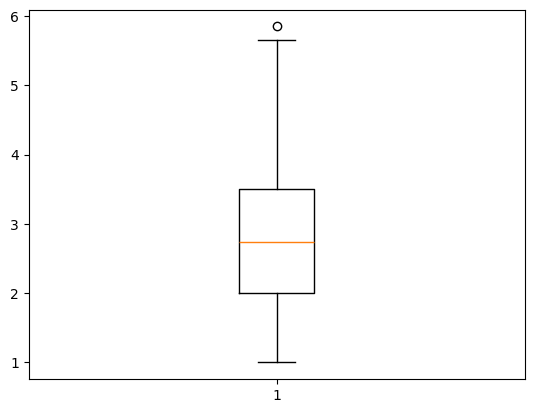

In [257]:
plt.boxplot(tips_encoded['tip'])

In [258]:
from sklearn.model_selection import train_test_split

X = tips_encoded.drop("tip", axis=1)
y = tips_encoded['tip']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
scaler = StandardScaler()

In [261]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [262]:
len(X)

235

In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RFC = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(RFC, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best MSE: 1.1573269322380466
Test MSE: 0.9673196446845267


In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

LR  = LinearRegression()
RFC  = RandomForestRegressor()

In [264]:
RFC.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [265]:
y_pred = RFC.predict(X_test_scaled)

In [266]:
from sklearn.model_selection import cross_val_score

RFC = RandomForestRegressor(random_state=42)
scores = cross_val_score(RFC, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())

Cross-validated MSE: 0.850632557068279


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [271]:
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
y_pred_lr = LR.predict(X_test_scaled)
R2 = r2_score(y_pred, y_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print(R2)

Linear Regression MSE: 0.6521502039487124
-0.10161425821403003


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_pred, y_test)
R2 = r2_score(y_pred, y_test)

print(mse)
print(R2)

0.6302678363829788
-0.10161425821403003
